In [20]:
from random import  randint,uniform,shuffle
import matplotlib.pyplot as plt
import numpy as np


def mul(mat,vec):
  pass


In [21]:
#return a dataset of type B
def datasetB(n):
  L=[]
  for _ in range(n):
    L.append([uniform(0, 1),uniform(0,1)])
  return L



In [22]:
def datasetA(n):
  L=[]
  for _ in range(n-4):
    L.append([uniform(0, 1),uniform(0,1)])
  L.extend([[0,0],[0,1],[1,0],[1,1]])
  #rotation
  t=uniform(0,2*np.pi)
  # rot=[[np.cos(t),-np.sin(t)],[np.sin(t),np.cos(t)]]
  L=[[x[0]*np.cos(t)-x[1]*np.sin(t),x[0]*np.sin(t)+x[1]*np.cos(t)] for x in L]
  shuffle(L)
  return L


#we used shuffle function of the random package, we can also implement it this way
def shuffleMe(L):
    # we have seen this algorithm in INF411
    for i in range(len(L) - 1, 0, -1):
        j = randint(0, i)
        L[i], L[j] = L[j], L[i]
    return L

In [4]:
def datasetC(n):
  """ we assume that the radius of the circle is  0.5
  """
  k=0
  L=[]
  while k <= n:
    a,b=uniform(0, 1),uniform(0,1)
    if (a-0.5)**2+(b-0.5)**2 <=0.25:
      L.append([a,b])
      k+=1
  return L

In [5]:
def datasetD(n):
  L=[]
  for _ in range(n):
      t=uniform(0,2*np.pi)
      L.append([0.5+0.5*np.cos(t),0.5+0.5*np.sin(t)])
  return L



In [6]:
def plot_dataset(data):
  fig=plt.figure(figsize=(5,5))
  X,Y=[x[0] for x in data],[x[1] for x in data]
  plt.scatter(X,Y)
  plt.show()

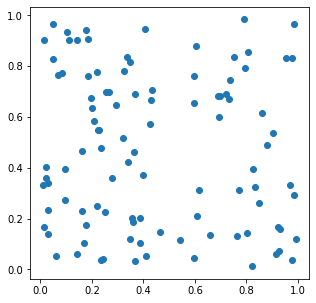

In [7]:
plot_dataset(datasetB(100))

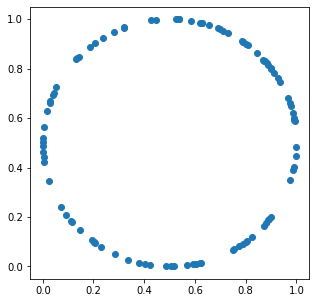

In [8]:
plot_dataset(datasetD(100))

In [9]:
def _sort(dataset):
  return list(sorted(dataset,key= lambda x:x[0]))

def is_oriented_clockwise(A,B,C):
  det=(B[0]-A[0])*(C[1]-A[1]) - (B[1]-A[1])*(C[0]-A[0]) 
  if A[0]<B[0] :
    if det <0 :
      return True
    else : return False
  elif A[0]>B[0] :
    if det < 0:
      return True
    else : return False

  return False



In [10]:
x,y,z=[0,0],[1,1],[0.75,0.5]
is_oriented_clockwise(y,x,z)

False

In [18]:
def convex_hull_sweeping(points):
    # sort points by x coordinate
    points.sort(key=lambda p: p[0])

    # initialize the upper and lower hulls
    upper_hull = []
    lower_hull = []

    # build the upper hull
    for p in points:
        while len(upper_hull) > 1:
            q = upper_hull[-1]
            r = upper_hull[-2]
            if (q[0] - r[0]) * (p[1] - r[1]) - (q[1] - r[1]) * (p[0] - r[0]) <= 0:
                upper_hull.pop()
            else:
                break
        upper_hull.append(p)

    # build the lower hull
    for p in reversed(points):
        while len(lower_hull) > 1:
            q = lower_hull[-1]
            r = lower_hull[-2]
            if (q[0] - r[0]) * (p[1] - r[1]) - (q[1] - r[1]) * (p[0] - r[0]) <= 0:
                lower_hull.pop()
            else:
                break
        lower_hull.append(p)

    # remove the last point of each hull (it's the first point of the other hull)
    upper_hull.pop()
    lower_hull.pop()

    # return the convex hull
    return upper_hull + lower_hull


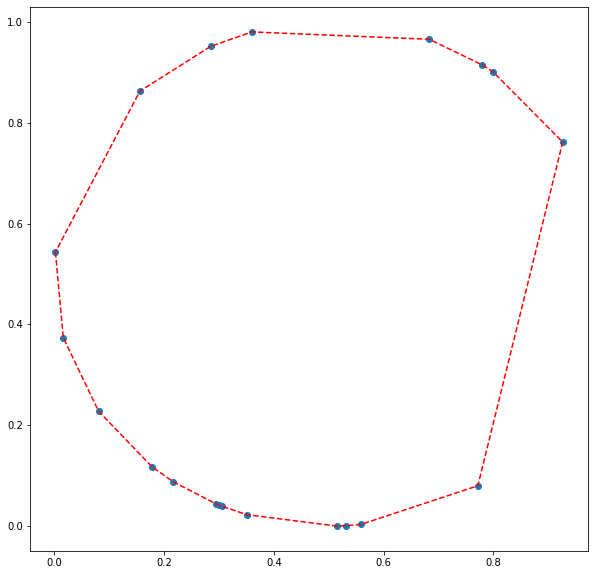

In [19]:

def plot_convex_hull(points, hull):
    fig=plt.figure(figsize=(10,10))

    # plot the points
    xs, ys = zip(*points)
    plt.scatter(xs, ys)

    # plot the convex hull
    xs, ys = zip(*hull)
    xs = list(xs) + [xs[0]]
    ys = list(ys) + [ys[0]]
    plt.plot(xs, ys, 'r--')
    plt.show()


points= datasetD(20)

plot_convex_hull(points, convex_hull_sweeping(points))


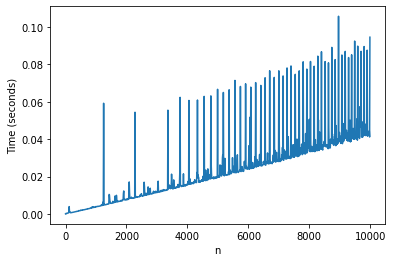

In [13]:
import time

def measure_time(f, n_values):
    x = []
    y = []
    for n in n_values:
        start_time = time.time()
        f(n)
        end_time = time.time()
        x.append(n)
        y.append(end_time - start_time)
    plt.plot(x, y)
    plt.xlabel('n')
    plt.ylabel('Time (seconds)')
    plt.show()

f= lambda n : convex_hull(datasetC(n))
measure_time(f, range(0, 10000, 10))

# Output-sensitive algorithm

**Median**

In [14]:
from random import choice

def quick_select(arr, k):
    """
    Select the kth element in l (0 based)
    :param l: List of numerics
    :param k: Index
    :return: The kth element of l
    """
    if len(arr) == 1:
        return arr[0]
    pivot = choice(arr)
    lows = [x for x in arr if x < pivot]
    highs = [x for x in arr if x > pivot]
    pivots = [x for x in arr if x == pivot]
    if k < len(lows):
        return quick_select(lows, k)
    elif k < len(lows) + len(pivots):
        return pivots[0]
    else:
        return quick_select(highs, k - len(lows) - len(pivots))

def find_median(arr):
    if len(arr) % 2 == 0:
        return (quick_select(arr, len(arr) // 2 - 1) + quick_select(arr, len(arr) // 2)) / 2
    else:
        return quick_select(arr, len(arr) // 2)


**Linear programming**

In [25]:
#verify if a certain point P is below the line defined by the two points of the basis
def is_below_line(P, basis): #basis is a couple of two points
    x1, y1 = basis[0]
    x2, y2 = basis[1]
    x, y = P
    return (x2 - x1)!=0 and y < (x * (y2 - y1) / (x2 - x1) + (x2*y1-x1*y2)/(x2-x1)) and P!=basis[0] and P!=basis[1]
# the new basis will (P1, P2) with P1 the last point that we added and P2 a point 
def slope(p1, p2):
    return (p1[1]-p2[1])/(p1[0]-p2[0]) #we suppose that p1[0]-p2[0]!=0

#find a new basis as described in the "rapport"
def find_new_basis(pk, P, old_basis):
    m=float('inf')
    ss=slope(old_basis[0], old_basis[1])
    res=None
    for p in P:
        if p[0]-pk[0]!=0 and abs(slope(p,pk)-ss)<m:
            res=p
            m=abs(slope(p,pk)-ss)
    return (pk, res)

#find the lowest line that is above all the points of the dataset 
def find_lowest_line(P, xm):
    # First pick an arbitrary point p1 with x < xm and another point p2 with x > xm
    p1 = None
    p2 = None
    for point in P:
        if point[0] < xm:
            p1 = point
        elif point[0] > xm:
            p2 = point
        if p1 and p2:
            break

    basis = (p1, p2)
    P2 = [p1, p2]
    L=shuffle(P)
    for pk in L:
        if  not is_below_line(pk, basis):
            basis = find_new_basis(pk, P2, basis)
        P2.append(pk)
    
    return basis
#find the highest line that is below all the points of the dataset
def find_highest_line(P, xm):
    # First pick an arbitrary point p1 with x < xm and another point p2 with x > xm
    p1 = None
    p2 = None
    for point in P:
        if point[0] < xm:
            p1 = point
        elif point[0] > xm:
            p2 = point
        if p1 and p2:
            break

    basis = (p1, p2)
    P2 = [p1, p2]
    
    L=shuffle(P)
    for pk in L:
        if  is_below_line(pk, basis):
            if pk[0]>xm:
                basis = find_new_basis(pk, [p for p in P2 if p[0]<=xm], basis)
            else:
                basis = find_new_basis(pk, [p for p in P2 if p[0]>xm], basis)

        P2.append(pk)
    
    return basis

In [26]:
def selection_algorithm(lst):
    k = len(lst) // 2
    pivot = partition(lst, 0, len(lst) - 1, k)
    if len(lst) % 2 == 1:
        return pivot
    else:
        return (pivot + partition(lst, 0, len(lst) - 1, k-1)) / 2

def partition(lst, start, end, k):
    pivot = lst[end]
    i = start
    for j in range(start, end):
        if lst[j] <= pivot:
            lst[i], lst[j] = lst[j], lst[i]
            i += 1
    lst[i], lst[end] = lst[end], lst[i]
    if i == k:
        return lst[i]
    elif i > k:
        return partition(lst, start, i-1, k)
    else:
        return partition(lst, i+1, end, k)

In [27]:
#find the upper part of the convex hull
def upper_hull(P):
    if len(P)<2:
        return P
    xm=selection_algorithm([p[0] for p in P])
    p1, p2=find_lowest_line(P,xm)
    if p1[0]>p2[0]:
        p1, p2 = p2, p1
    P1=[p for p in P if p[0]>=p2[0]]
    P2=[p for p in P if p[0]<=p1[0]]
    return upper_hull(P2)+upper_hull(P1)

#find the lowest part of the convex hull 
def lower_hull(P):
    if len(P)<2:
        return P
    xm=selection_algorithm([p[0] for p in P])
    p1, p2=find_highest_line(P,xm)
    if p1[0]>p2[0]:
        p1, p2 = p2, p1
    P1=[p for p in P if p[0]>=p2[0]]
    P2=[p for p in P if p[0]<=p1[0]]
    return lower_hull(P2)+lower_hull(P1)

#the one
def the_algo(P):
    return upper_hull(P)+lower_hull(P)[::-1][1:]


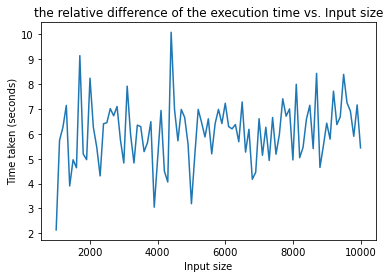

In [ ]:
import time 
input_sizes=range(1000, 10001, 100)
times = []

for size in input_sizes:
    P=datasetA(size)

    start = time.time()
    PPP=sweeping(P)
    mid=time.time()
    PP=the_algo(P)
    end = time.time()
    times.append((end-mid)/(mid-start))

plt.plot(input_sizes, times)
plt.xlabel("Input size")
plt.ylabel("Time taken (seconds)")
plt.title("the relative difference of the execution time vs. Input size")
plt.show()

In [ ]:
D=datasetD(10**5)
start = time.time()
DD=sweeping(D)
mid=time.time()
DDD=the_algo(D)
end=time.time()
(end-mid)/(mid-start) 

44.707834759705804

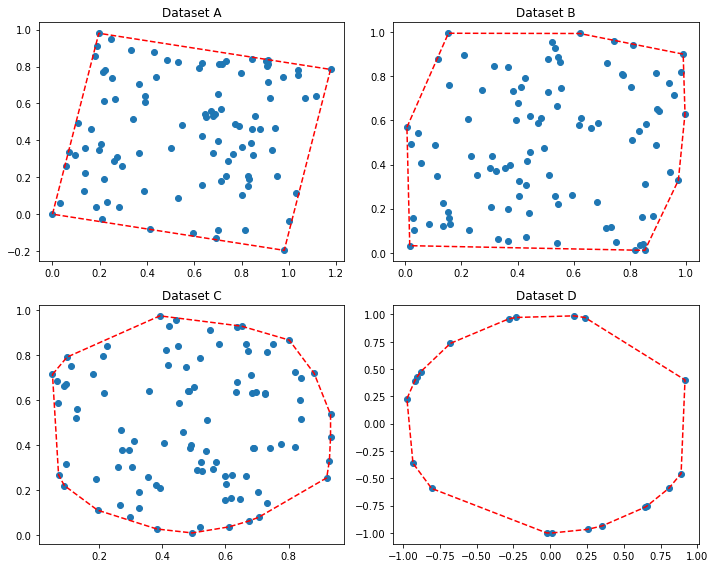

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot datasetA an her convex hull
PA=datasetA(100)
PPA=the_algo(PA)
axs[0, 0].scatter([p[0] for p in PA ], [p[1] for p in PA ])
axs[0, 0].plot([p[0] for p in PPA ], [p[1] for p in PPA ], 'r--')
axs[0, 0].set_title("Dataset A")

# Plot datasetB an her convex hull
PB=datasetB(100)
PPB=the_algo(PB)
axs[0, 1].scatter([p[0] for p in PB ], [p[1] for p in PB ])
axs[0, 1].plot([p[0] for p in PPB ], [p[1] for p in PPB ], 'r--')
axs[0, 1].set_title("Dataset B")

# Plot datasetC an her convex hull
PC=datasetC(100)
PPC=the_algo(PC)
axs[1, 0].scatter([p[0] for p in PC ], [p[1] for p in PC ])
axs[1, 0].plot([p[0] for p in PPC ], [p[1] for p in PPC ], 'r--')
axs[1, 0].set_title("Dataset C")

# Plot datasetD an her convex hull
PD=datasetD(20)
PPD=the_algo(PD)
axs[1, 1].scatter([p[0] for p in PD ], [p[1] for p in PD ])
axs[1, 1].plot([p[0] for p in PPD ], [p[1] for p in PPD ], 'r--')
axs[1, 1].set_title("Dataset D")

# Adjust subplot layout
plt.tight_layout()

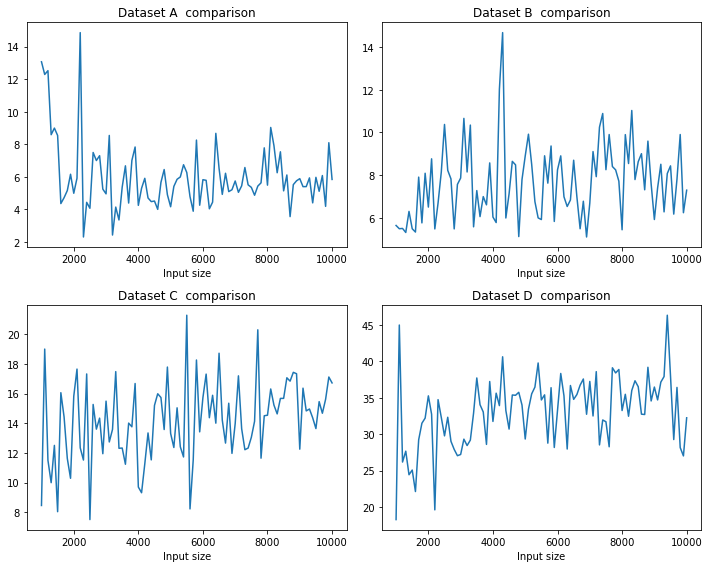

In [ ]:
import time 


fig, axs = plt.subplots(2, 2, figsize=(10, 8))


# sweeping vs the main algorithm: Dataset A 
input_sizes=range(1000, 10001, 100)
times = []

for size in input_sizes:
    P=datasetA(size)
    start = time.time()
    PPP=sweeping(P)
    mid=time.time()
    PP=the_algo(P)
    end = time.time()
    times.append((end-mid)/(mid-start))

axs[0,0].plot(input_sizes, times)
axs[0,0].set_xlabel("Input size")
axs[0,0].set_title("Dataset A  comparison")

# sweeping vs the main algorithm: Dataset B 
input_sizes=range(1000, 10001, 100)
times = []

for size in input_sizes:
    P=datasetB(size)
    start = time.time()
    PPP=sweeping(P)
    mid=time.time()
    PP=the_algo(P)
    end = time.time()
    times.append((end-mid)/(mid-start))

axs[0,1].plot(input_sizes, times)
axs[0,1].set_xlabel("Input size")
axs[0,1].set_title("Dataset B  comparison")

# sweeping vs the main algorithm: Dataset C
input_sizes=range(1000, 10001, 100)
times = []

for size in input_sizes:
    P=datasetC(size)
    start = time.time()
    PPP=sweeping(P)
    mid=time.time()
    PP=the_algo(P)
    end = time.time()
    times.append((end-mid)/(mid-start))

axs[1,0].plot(input_sizes, times)
axs[1,0].set_xlabel("Input size")
axs[1,0].set_title("Dataset C  comparison")

# sweeping vs the main algorithm: Dataset D
input_sizes=range(1000, 10001, 100)
times = []

for size in input_sizes:
    P=datasetD(size)
    start = time.time()
    PPP=sweeping(P)
    mid=time.time()
    PP=the_algo(P)
    end = time.time()
    times.append((end-mid)/(mid-start))

axs[1,1].plot(input_sizes, times)
axs[1,1].set_xlabel("Input size")
axs[1,1].set_title("Dataset D  comparison")
# Adjust subplot layout
plt.tight_layout()